# Figure 2: Mutational composition of the final populations

After the final populations were sequenced, we summarized the mutations impacting genes or nearby regulatory elements observed in our populations with a decorated heatmap. Each mutation type was color coded together with other samples annotations. The mutations were ordered by prevalence. 


In [9]:
#Libraries
library("tidyverse")
library("ComplexHeatmap")

source("../r/eefe_functions.R")

In [10]:
#Read and prepare the data
data=read.csv("../../data/mutations_populations.csv")
data = data %>% arrange(Population)
data = data %>% mutate(Strain = str_extract(Population,'[0-9][0-9][0-9]'))
head(data)

,Identifier,Gene,Mutation,Class,AF,Population,Strain
,<int>,<fct>,<fct>,<fct>,<dbl>,<fct>,<chr>
1,79,ycjW,frame,Small_indel,12.5,F606-1,606
2,83,lon,intergenic,Intergenic_snp,8.3,F606-1,606
3,84,lon,intergenic,Intergenic_snp,71.3,F606-1,606
4,88,dsdA,I265T,Non_Synonymous,6.1,F606-1,606
5,89,metA,I124L,Non_Synonymous,13.7,F606-1,606
6,92,mrdB,R208S,Non_Synonymous,57.6,F606-1,606


In [12]:
## Prepare the input
prepared = data %>% group_by(.dots=c("Population","Gene")) %>% mutate(collapsed=paste(Class, collapse = ';'))
prepared = prepared %>% select(Gene, Population, collapsed)
prepared = prepared %>% distinct()
prepmat = prepared %>% spread(Population,collapsed,fill="",drop=FALSE)
## Prepare the matrix
mat=as.matrix(prepmat)
rownames(mat) = mat[,1]
mat = mat[, -1]
#Order the matrix
logimat=!(mat == "")
#mat=mat[order(rowSums(logimat),decreasing=T),]
#Save the mutation
prepared$state="1"
mut_mat = prepared %>% spread(Population,state,fill="0",drop=FALSE)
head(mut_mat)

Gene,collapsed,F606-1,F606-2,F606-3,F606-4,F607-1,F607-2,F607-3,F607-4,⋯,R607-3,R607-4,S606-1,S606-2,S606-3,S606-4,S607-1,S607-2,S607-3,S607-4
<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
araB,Intergenic_snp,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
araB,Intergenic_snp;Intergenic_snp,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
araB,Large_amplification,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
araB,Large_deletion,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
araB,Non_Synonymous,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
araB,Non_Synonymous;Large_amplification,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [85]:
#Get the populations information
pheno = read.csv("../../data/sample_annotations.csv")
Environment=pheno$Environment
Linage = pheno$Linage
ha = HeatmapAnnotation(Environment = Environment, Linage= Linage,
                       col = list(Environment = c("Fast" = "#00A08A", "Random" = '#F98400',"Slow"='#5BBCD6'),
                                 Linage = c("606"='#446455',"607"='#C7B19C')),
                       annotation_height = unit(c(5, 5, 15), "mm"),
                       annotation_legend_param = list(legend_position = "bottom",Environment = list(title = "Environment"),Linage = list(title = "Linage")))

All mutation types: Non_Synonymous, Intergenic_snp, Small_indel,
Large_deletion, Large_amplification, Synonymous, Stop



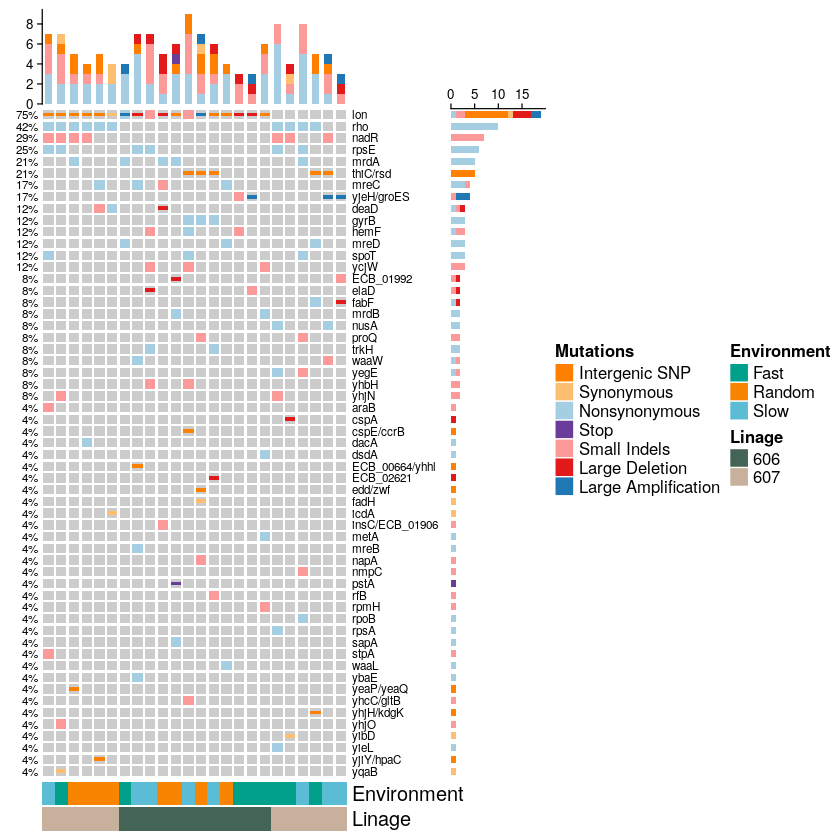

In [88]:
#OncoPrint
#pdf("Figure2.pdf")
oncoPrint(mat, get_type = function(x) strsplit(x, ";")[[1]],
               alter_fun = alter_fun, col = col, remove_empty_columns = TRUE,
               row_names_gp = gpar(fontsize = 7),
               heatmap_legend_param = list(title = "Mutations", at = c("Intergenic_snp",'Synonymous',"Non_Synonymous", 'Stop', "Small_indel" ,
              'Large_deletion',"Large_amplification") , 
                                           labels = c("Intergenic SNP",'Synonymous',"Nonsynonymous",'Stop', "Small Indels",'Large Deletion','Large Amplification')),
                bottom_annotation = ha,pct_gp = gpar(fontsize = 7),
          split = sample(c("606","607"), nrow(mat), replace = TRUE),column_order=NULL
       
)
#dev.off()
